## 넘파이로 데이터 준비하기 

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0,  9.8, 10.5, 10.6, 11.0, 11.2, 
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0,]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0,  500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0,  600.0, 600.0,
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0,  620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
               925.0, 975.0, 950.0,   6.7,   7.5,    7.0,   9.7,   9.8,
                 8.7,  10.0,   9.9,   9.8,  12.2,   13.4,  12.2,  19.7,
               19.9]

넘파이로 데이터를 조작하자. 넘파이의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 후 열 단위로 연결한다

In [2]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
# 확인 출력
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [3]:
# 넘파이로 타깃 데이터 만들기
# ones(), zeros()로 1과 0으로 채워진 배열을 만들고, concatenate()로
# 붙여 타깃 데이터를 만들자

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련셋과 테스트셋 나누기
사이킷런의 model_section 모듈 아래 있는 train_test_split() 함수는 전달되는 배열을 비율에 맞게(기본 테스트 비율 25%) 데이터를 나눠주고, 나눠주기 전 알아서 랜덤으로 섞어준다. 이때 랜덤 시드를 결정할 수 있는데, random_state 매개변수를 조절하면 된다

또한 일반적으로 랜덤 배정을 했을 때 도미와 빙어의 비율대로 섞이지 않는 문제가 생길 수 있는데, 이는 stratify 매개변수에 타깃 데이터를 전달함으로써 해결할 수 있다

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# 확인
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# k-최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

1.0


In [6]:
# 도미로 예측하는 새 데이터는?
print(kn.predict([[25, 150]]))

[0.]


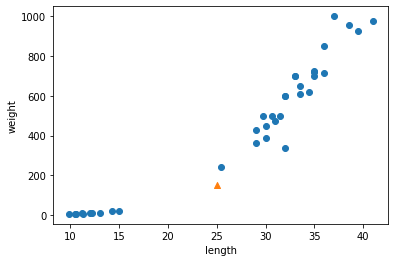

In [7]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

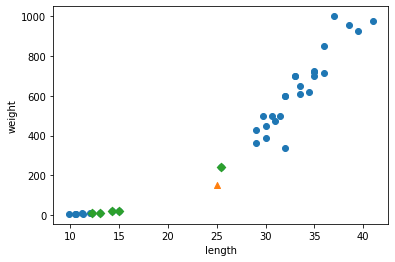

In [8]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 기준을 맞춰라
위 그래프를 언뜻 보면 이상하지만 그래프의 단위를 봐야함. y축의 weight 값이 length 값보다 많이 압축되어있기때문에 보기에는 빙어 데이터가 멀어보이지만 실제로는 빙어 데이터가 도미 데이터보다 더 가까이 있음. 이런 상황을 **스케일(scale)**이 다르다고 한다. 따라서 이러한 문제를 해결하기 위해 특성값을 일정한 기준으로 맞추는 **데이터 전처리(data preprocessing)**를 해주어야 한다

가장 널리 사용되는 전처리 방법 중 하나로 **표준 점수(standard score, or Z)**가 있다. 표준점수는 평균을 빼고 표준편차로 나누어서 구할 수 있다

In [9]:
# axis를 0으로 지정하면 행을 따라 각 열의 통계값을 계산
# -> 각 특성별로 평균과 표준편차를 계산

# mean(): 평균을 계산한다
mean = np.mean(train_input, axis=0)

# std(): 표준편차를 계산한다
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


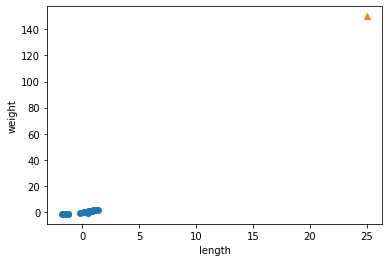

In [11]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누기
train_scaled = (train_input - mean) / std

# 넘파이의 broadcasting 기능으로 train_input의 모든 행에서
# mean에 있는 두 평균값을 빼주고 std에 있는 두 표준편차를 모든 행에 적용해준다

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 전처리 데이터로 모델 훈련하기